<a href="https://colab.research.google.com/github/Rochakr4/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#importing essential datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=ee947ef782669964a77d9490acd018bae7a57ce1278862736e9f448aad97babc
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [5]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#reading file
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 4-Online Retail Customer Segmentation /Online Retail.csv')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [64]:
df.describe()

,Quantity,UnitPrice,CustomerID,Month,Day,Year,Total_Sales
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,6.945007,15.709711,2010.934259,22.394749
std,180.420210,22.096788,1713.169877,3.329803,8.041305,0.247829,309.055588
min,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.000000,10.000000,2011.000000,4.680000
50%,6.000000,1.950000,15159.000000,7.000000,15.000000,2011.000000,11.800000
75%,12.000000,3.750000,16795.000000,10.000000,22.000000,2011.000000,19.800000
max,80995.000000,8142.750000,18287.000000,12.000000,31.000000,2011.000000,168469.600000


# Data Prepping

##NaN value handling

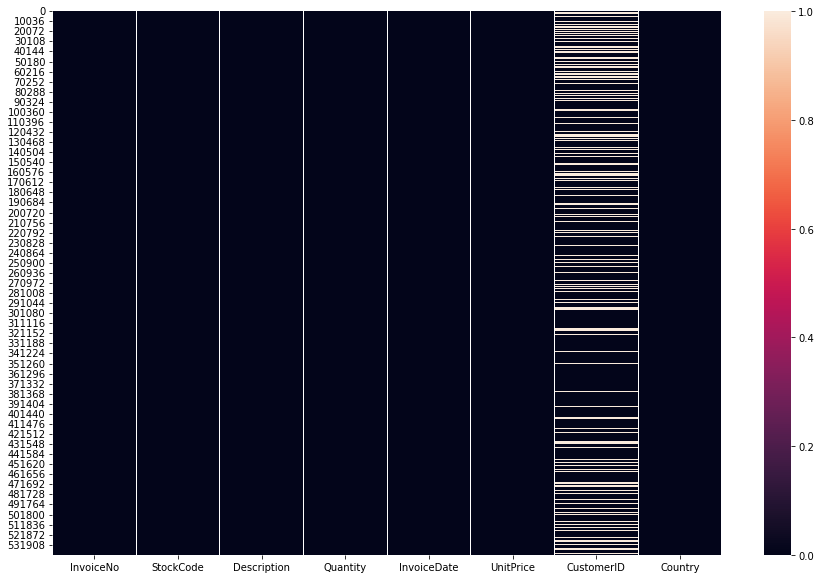

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

A lot of Nan values are found in the 'CustomerID' feature, which in turn is a unique identifier. So, implementing imputation techniques doesn’t make sense.

In [23]:
df.dropna(inplace=True)# dropping Nan value rows

For further better analysis iam creating date-related features such as ‘month’, ‘day’, ‘year’ etc.

In [24]:
#Removing the time from invoice date, since it's not in proper format. This will enable us to convert string type to datetime object
df.loc[: , 'InvoiceDate']=df.loc[: , 'InvoiceDate'].apply(lambda x: x[:][:-5])
#convering to datetime object
df.loc[ : , 'InvoiceDate']=pd.to_datetime(df.loc [ : ,'InvoiceDate'])
#creating month year and day features
df.loc[:,'Month']=df.loc[:,'InvoiceDate'].dt.month
df.loc[:,'Day']=df.loc[:,'InvoiceDate'].dt.day
df['Day_Name']=df['InvoiceDate'].dt.day_name()
df.loc[:,'Year']=df.loc[:,'InvoiceDate'].dt.year

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_Name,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,1,12,Tuesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,Tuesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,1,12,Tuesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,Tuesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,Tuesday,2010


# EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

## InvoiceNo

As given in data discription ,Invoice number is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

In [38]:
df[df['InvoiceNo'].str.contains('C')]#Checking for cancelled invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_Name,Year
141,C536379,D,Discount,-1,2010-01-12,27.50,14527.0,United Kingdom,1,12,Tuesday,2010
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12,4.65,15311.0,United Kingdom,1,12,Tuesday,2010
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12,1.65,17548.0,United Kingdom,1,12,Tuesday,2010
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12,0.29,17548.0,United Kingdom,1,12,Tuesday,2010
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12,0.29,17548.0,United Kingdom,1,12,Tuesday,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12,0.83,14397.0,United Kingdom,9,12,Monday,2011
541541,C581499,M,Manual,-1,2011-09-12,224.69,15498.0,United Kingdom,9,12,Monday,2011
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12,10.95,15311.0,United Kingdom,9,12,Monday,2011
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12,1.25,17315.0,United Kingdom,9,12,Monday,2011


There are 8,905 cancellation entries in the dataset.

For better analysis I am dropping all the canceled invoice rows because there are chances that it may act as noise or bias.

Here I am not going to remove all the transactions related to the cancellation because there was an urge or intention of purchasing.

In [39]:
df=df[~df['InvoiceNo'].str.contains('C')]#Dropping the canceled row entries

## Description

In [53]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)#Checking for items and the corresponding quantities sold.

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
                                       ...  
BLACK VINT ART DEC CRYSTAL BRACELET        1
FLOWER SHOP DESIGN MUG                     1
SET 36 COLOURING PENCILS DOILEY            1
HEN HOUSE W CHICK IN NEST                  1
AMBER BERTIE GLASS BEAD BAG CHARM          1
Name: Quantity, Length: 3877, dtype: int64

There are 3877 items sold from 01/12/2010 to 09/12/2011.

## UnitPrice

In [51]:
pd.concat([df.groupby('Description')['Quantity'].sum(), df.groupby('Description')['UnitPrice'].max()], axis=1).sort_values(by='UnitPrice',ascending=False)

,Quantity,UnitPrice
Description,,
POSTAGE,3120,8142.750
Manual,7179,4161.060
DOTCOM POSTAGE,16,1599.260
PICNIC BASKET WICKER 60 PIECES,61,649.500
VINTAGE BLUE KITCHEN CABINET,26,295.000
...,...,...
POPART WOODEN PENCILS ASST,8900,0.120
FOLDING CAMPING SCISSOR W/KNIF & S,30,0.120
PORCELAIN BUDAH INCENSE HOLDER,1501,0.100


The unit price is ranging from 0.001 to 8142.75.
Unit price of 75% of items sold is less than 4.

## Total sales

For better understanding and analysis am introducing a new feature i.e., 'Total sales' which is the arrived by multiplying quantity and unit price

In [55]:
df['Total_Sales']=df['Quantity']*df['UnitPrice']#Introducing Total sales feature

In [90]:
df.sort_values(by='Total_Sales',ascending=False).reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_Name,Year,Total_Sales
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-09-12,2.08,16446.0,United Kingdom,9,12,Monday,2011,168469.60
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,1,18,Tuesday,2011,77183.60
2,222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-10-06,649.50,15098.0,United Kingdom,10,6,Thursday,2011,38970.00
3,173382,551697,POST,POSTAGE,1,2011-03-05,8142.75,16029.0,United Kingdom,3,5,Saturday,2011,8142.75
4,348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20,5.06,17450.0,United Kingdom,9,20,Tuesday,2011,7144.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,279324,561284,22167,OVAL WALL MIRROR DIAMANTE,1,2011-07-26,0.00,16818.0,United Kingdom,7,26,Tuesday,2011,0.00
397920,285657,561916,M,Manual,1,2011-01-08,0.00,15581.0,United Kingdom,1,8,Saturday,2011,0.00
397921,395529,571035,M,Manual,1,2011-10-13,0.00,12446.0,RSA,10,13,Thursday,2011,0.00
397922,439361,574469,22385,JUMBO BAG SPACEBOY DESIGN,12,2011-04-11,0.00,12431.0,Australia,4,11,Monday,2011,0.00


Lets check how many items constitute percentage proportion of total sales happened over the year.

In [111]:
def check(val):
   for i in range(1,3877):
       tmp=df.groupby('Description')['Total_Sales'].sum().sort_values(ascending=False).head(i).reset_index()['Total_Sales'].sum()/df['Total_Sales'].sum()
       if tmp>val:
          print(f'Top {i} items i.e., {round(i*100/3877,2)}% of total items for sale constitute {round(tmp*100,2)}% of total sales')
          break

In [112]:
check(0.25)
check(0.5)
check(0.75)
check(0.9)

Top 61 items i.e., 1.57% of total items for sale constitute 25.12% of total sales
Top 237 items i.e., 6.11% of total items for sale constitute 50.04% of total sales
Top 658 items i.e., 16.97% of total items for sale constitute 75.02% of total sales
Top 1306 items i.e., 33.69% of total items for sale constitute 90.0% of total sales


## Country

In [129]:
temp_df=pd.concat([df.groupby('Country')['CustomerID'].count(), df.groupby('Country')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'})
temp_df['Total sales to customer ratio']=temp_df['Total_Sales']/temp_df['No. of customers']

In [130]:
temp_df.sort_values(by='Total sales to customer ratio',ascending=False).reset_index()

,Country,No. of customers,Total_Sales,Total sales to customer ratio
0,Netherlands,2363,285446.340,120.798282
1,Australia,1185,138521.310,116.895620
2,Japan,321,37416.370,116.561900
3,Singapore,222,21279.290,95.852658
4,Sweden,451,38378.330,85.096075
5,Denmark,380,18955.340,49.882474
6,Lithuania,35,1661.060,47.458857
7,Lebanon,45,1693.880,37.641778
8,EIRE,7238,265545.900,36.687745
9,Brazil,32,1143.600,35.737500


In [131]:
#Creating bar graph from above dataframe
px.bar(data_frame=temp_df.sort_values(by='Total sales to customer ratio',ascending=False).reset_index(),
                  width=1500,height=800,
                  x='Total sales to customer ratio',y='Country',
                  hover_data=['No. of customers'],color='Total_Sales',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Countries w.r.t total sales and sales to no. of customer ratio')